In [1]:
import torch
dist = torch.distributions
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
mix = dist.MixtureSameFamily(
    mixture_distribution=dist.Categorical(torch.tensor([0.2, 0.8])),
    component_distribution=dist.Normal(torch.tensor([0.1, 3]), torch.tensor([0.6, 3])),
)

In [3]:
x = torch.linspace(-4., 4, 5)

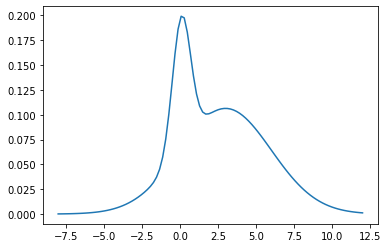

In [4]:
theta_range = torch.linspace(-8, 12, 100)
plt.plot(theta_range, mix.log_prob(theta_range).exp())

In [5]:
mix.mean, mix.stddev

(tensor(2.4200), tensor(2.9356))

In [6]:
next_sample = lambda cur_sample: dist.Normal(loc = cur_sample, scale=1).sample().item()

In [7]:
next_sample(1)

2.4083309173583984

In [8]:
p = lambda x: mix.log_prob(torch.tensor(x)).exp().item()
lp = lambda x: mix.log_prob(torch.tensor(x)).item()

In [9]:
p(2)

0.10151920467615128

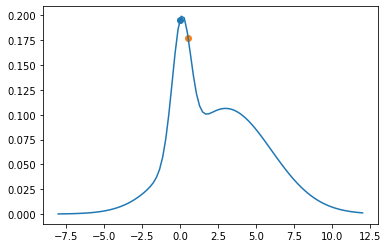

In [10]:
num_iter = 10
xs = [None]*num_iter
xs[0] = 0.
plt.plot(theta_range, mix.log_prob(theta_range).exp())
plt.scatter(xs[0], p(xs[0]))

xs[1] = next_sample(xs[0])
plt.scatter(xs[1], p(xs[1]))



0.589009759546108

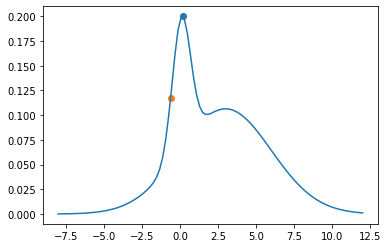

In [11]:
num_iter = 10
xs = [None]*num_iter
xs[0] = 0.2
plt.plot(theta_range, mix.log_prob(theta_range).exp())
plt.scatter(xs[0], p(xs[0]))

xs[1] = next_sample(xs[0])
plt.scatter(xs[1], p(xs[1]))

a = p(xs[1])/p(xs[0])
a

In [12]:
u = dist.Uniform(0, 1).sample().item()
print(u)

0.32451575994491577


In [13]:
if u < a:
    xs[1] = xs[0]

In [14]:
x_start = 0.
num_iter = 20000
xs = torch.empty(num_iter)
xs[0] = x_start
lu = torch.log(dist.Uniform(0, 1).sample([num_iter]))
for i in range(1, num_iter):
    xs[i] = next_sample(xs[i-1])
   
    la = lp(xs[i]) - lp(xs[i-1])

    if lu[i] > la:
        xs[i] = xs[i-1]
    
    

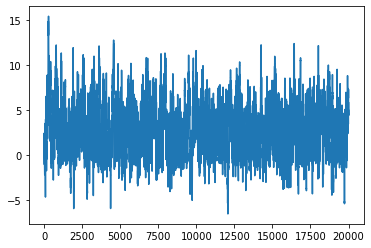

In [15]:
plt.plot(xs)

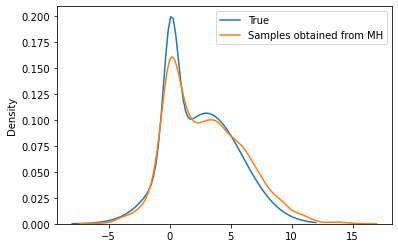

In [16]:
import seaborn as sns

plt.plot(theta_range, mix.log_prob(theta_range).exp(), label='True')
sns.kdeplot(torch.tensor(xs[:10000]), label='Samples obtained from MH')
plt.legend()


In [17]:
y = 4*x + 0.5*torch.randn(5)
prior = dist.Normal(loc = 0., scale = 1.)
log_likelihood = lambda t: dist.Normal(loc = x*t, scale=1.).log_prob(y).sum(axis=0)
unnorm_post = lambda t:log_likelihood(torch.tensor(t)).item() - prior.log_prob(torch.tensor(t)).item()

In [18]:
unnorm_post(0.)

-323.5117255449295

In [19]:
unnorm_post(4.)

4.246489524841309

In [20]:
x_start = 0.
num_iter = 5000
xs = torch.empty(num_iter)
xs[0] = x_start
lu = torch.log(dist.Uniform(0, 1).sample([num_iter]))
for i in range(1, num_iter):
    xs[i] = next_sample(xs[i-1])
   
    la = unnorm_post(xs[i]) - unnorm_post(xs[i-1])
    #print(la, lu[i])
    if lu[i] > la:
        xs[i] = xs[i-1]
    

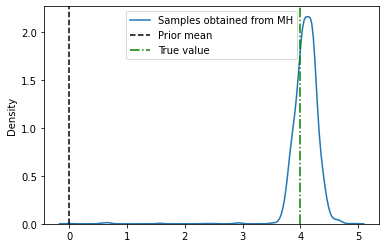

In [21]:
import seaborn as sns

#plt.plot(theta_range, unnorm_post(theta_range), label='True')
sns.kdeplot(torch.tensor(xs[:-num_iter//2]), label='Samples obtained from MH')
plt.axvline(0., label='Prior mean', color='k', linestyle='--')
plt.axvline(4, label='True value', color='g', linestyle='-.')


plt.legend()



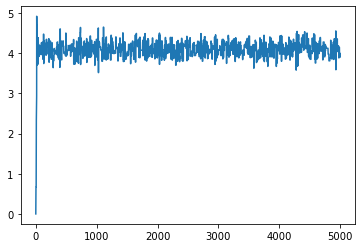

In [22]:
plt.plot(xs)

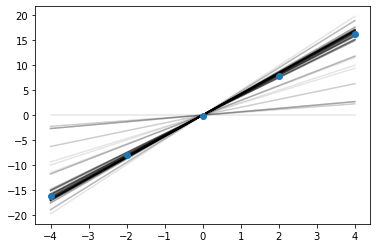

In [23]:
for i in range(100):
    plt.plot(x, xs[i]*x, alpha=0.1, color='k')
plt.scatter(x, y, zorder=10)

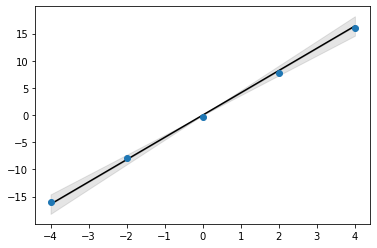

In [24]:
xs_mean = xs.mean()
xs_std = xs.std()

plt.plot(x, xs_mean*x, color='k')
plt.scatter(x, y, zorder=10)
plt.fill_between(x, xs_mean*x, (xs_mean+2*xs_std)*x, color='k', alpha=0.1)

plt.fill_between(x, xs_mean*x, (xs_mean-2*xs_std)*x, color='k', alpha=0.1)



References

1. https://www.youtube.com/watch?v=yCv2N7wGDCw
